In [138]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

$u_{xx} + u_{yy} = 0$

1. Length along x and y
2. Grid points along x and y
3. dx, dy
4. Boundary conditions
5. iterative formulation

In [139]:
#
Lx = 1.0
Ly = 1.0
nx = 100
ny = 100
x = np.linspace(0, Lx, nx+2)
y = np.linspace(0, Ly, ny+2)

dx = Lx/(nx+1)
dy = Ly/(ny+1)

Tleft = 0
Tbottom = 0
Tright = 100
Ttop = 100

T = np.zeros((nx+2, ny+2))
# print(T)
Tguess = 10
T.fill(Tguess)
T[0,:] = Tleft
T[-1,:] = Tright
T[:,-1] = Ttop
T[:,0] = Tbottom
# T
for k in range(0, 1000):
    for i in range(1, nx+1):
        for j in range(1, ny+1):
            T[i,j] = ((dy)**2*(T[i+1, j]+T[i-1, j])+(dx)**2*(T[i, j+1]+T[i, j-1]))/(2*(dx**2+dy**2))

In [140]:
print(T)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+02]
 [0.00000000e+00 7.62505023e-03 1.52480191e-02 ... 3.01836555e+01
  4.99744576e+01 1.00000000e+02]
 [0.00000000e+00 1.52480191e-02 3.04919424e-02 ... 4.98979455e+01
  6.97142325e+01 1.00000000e+02]
 ...
 [0.00000000e+00 3.01836555e+01 4.98979455e+01 ... 9.97737165e+01
  9.98868582e+01 1.00000000e+02]
 [0.00000000e+00 4.99744576e+01 6.97142325e+01 ... 9.98868582e+01
  9.99434291e+01 1.00000000e+02]
 [0.00000000e+00 1.00000000e+02 1.00000000e+02 ... 1.00000000e+02
  1.00000000e+02 1.00000000e+02]]


In [141]:
X,Y = np.meshgrid(x,y,indexing="ij")
# X
# Y

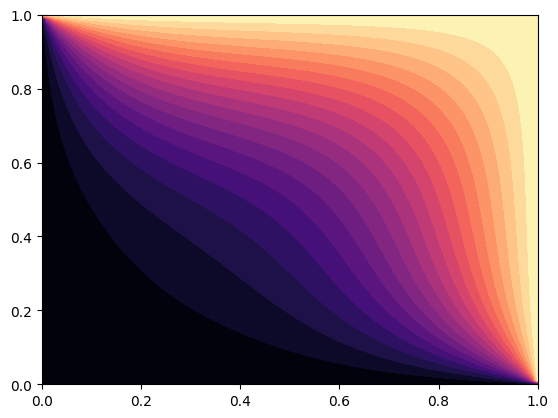

In [142]:
plt.contourf(X, Y, T, levels=20,cmap='magma')

In [143]:
#Direct approach

k = 2
I = np.eye(k, k)
d = np.ones(k)
MM = sp.sparse.diags([d, -2*d, d], [-1,0,1], shape=(k,k))
M = MM.toarray()

In [144]:
S = np.kron(M, I) + np.kron(I, M)
S

array([[-4.,  1.,  1.,  0.],
       [ 1., -4.,  0.,  1.],
       [ 1.,  0., -4.,  1.],
       [ 0.,  1.,  1., -4.]])

In [145]:
T = np.zeros((k+2, k+2))
Tleft = 0
Tbottom = 0
Tright = 100
Ttop = 100

# T = np.zeros((nx+2, ny+2))
# print(T)
# Tguess = 10
# T.fill(Tguess)
T[0,:] = Tleft
T[-1,:] = Tright
T[:,-1] = Ttop
T[:,0] = Tbottom